In [179]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [154]:
df=pd.read_csv('Customer Churn.csv')

In [155]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df=df.drop(['customerID'],axis=1)

In [157]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [158]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Representation ')

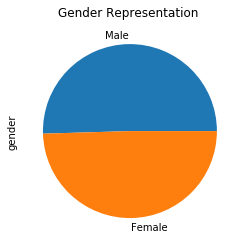

In [108]:
#Gender Representation
df['gender'].value_counts().plot(kind='pie')
plt.title("Gender Representation ")

Text(0.5, 1.0, 'Tenure Plot')

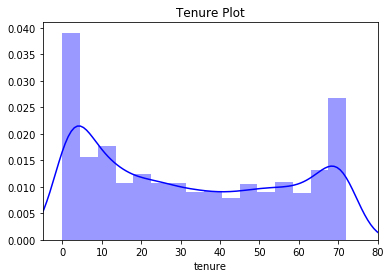

In [109]:
# Tenure
sns.distplot(df['tenure'],kde=True,color='blue')
plt.xlim(-5,80)
plt.title("Tenure Plot")

# A large chunk of customer are customers who are recent.

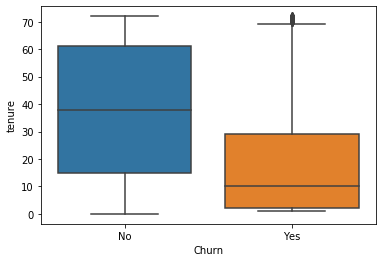

In [110]:
sns.boxplot(y=df["tenure"],x=df["Churn"])

Text(0.5, 1.0, 'There is not a huge impact that Phone service has on churn')

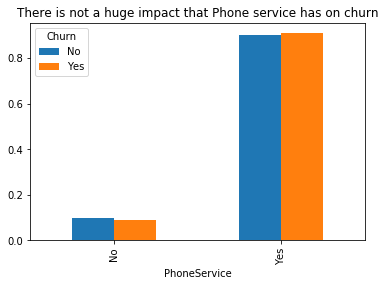

In [111]:
pd.crosstab(df["PhoneService"],df['Churn'],normalize='columns').plot(kind='bar')
plt.title('There is not a huge impact that Phone service has on churn')

#sns.catplot(kind='bar',x='Churn',y='PhoneService',data=ps)
#sns.catplot(data='df',kind='bar',)

Text(0.5, 1.0, 'Surprisingly people with multiple lines are more likely to unsubscribe ')

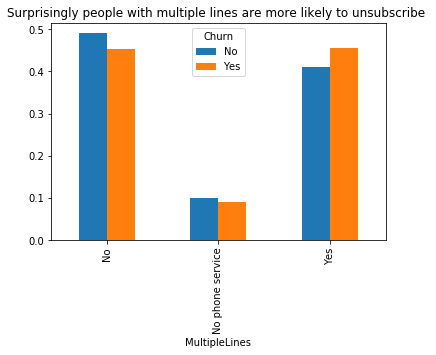

In [112]:
mulin=pd.crosstab(df["MultipleLines"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title('Surprisingly people with multiple lines are more likely to unsubscribe ')

Text(0.5, 1.0, 'People with a fibre optic connection are likely to churn at a higher rate, while people at a DSL connection are more likely to be retained')

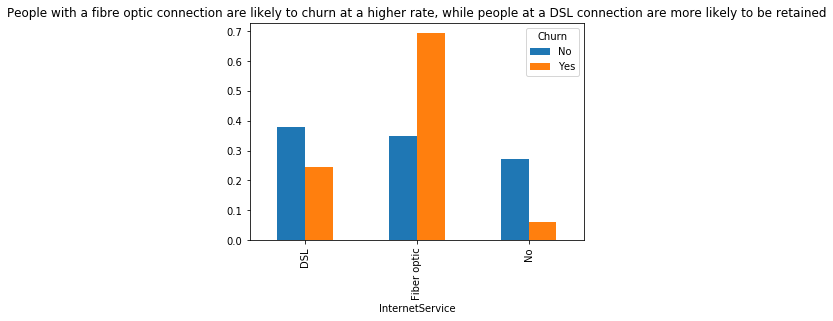

In [113]:
internet=pd.crosstab(df["InternetService"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title("People with a fibre optic connection are likely to churn at a higher rate, while people at a DSL connection are more likely to be retained")

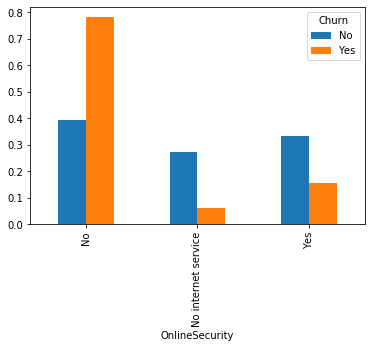

In [114]:
internet=pd.crosstab(df["OnlineSecurity"],df["Churn"],normalize="columns").plot(kind="bar")
#plt.title("People with internet service are less likely to churn")
internet


Text(0.5, 1.0, 'People with internet backup are less likely to churn')

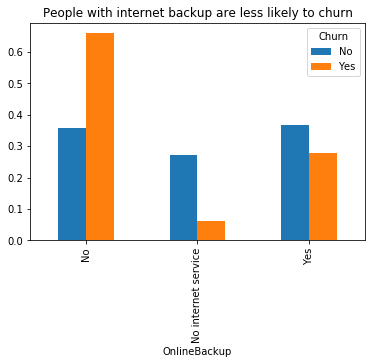

In [115]:
internet=pd.crosstab(df["OnlineBackup"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title("People with internet backup are less likely to churn")

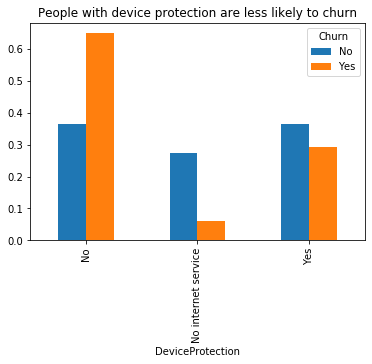

In [116]:

internet=pd.crosstab(df["DeviceProtection"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title("People with device protection are less likely to churn")
plt.show()


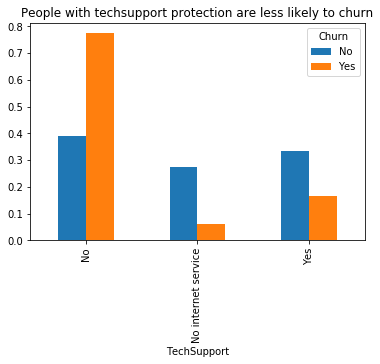

In [117]:

internet=pd.crosstab(df["TechSupport"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title("People with techsupport protection are less likely to churn")
plt.show()

Text(0.5, 1.0, 'Month to month charges have a much higher churn ratio')

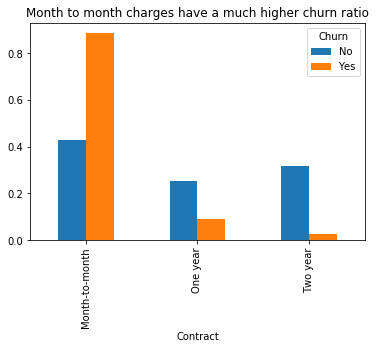

In [118]:
internet=pd.crosstab(df["Contract"],df["Churn"],normalize="columns").plot(kind="bar")
plt.title("Month to month charges have a much higher churn ratio")

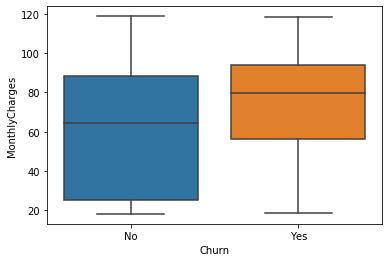

In [119]:
sns.boxplot(y=df["MonthlyCharges"],x=df["Churn"])

# Feature Engineering

In [159]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [160]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"],downcast='float',errors='coerce')

In [161]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [162]:
df=pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])

In [166]:
df.drop([ 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No'],axis=1,inplace=True)

# Classification Algos

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [172]:
df.dropna()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.850000,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.750000,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
5,0,8,99.65,820.500000,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,1
6,0,22,89.10,1949.400024,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
7,0,10,29.75,301.899994,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,28,104.80,3046.050049,0,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,1
9,0,62,56.15,3487.949951,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [187]:
df=df.drop(['TotalCharges'],axis=1)

In [188]:
X=df.iloc[:,:-1].values
y=df['Churn_Yes'].values

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [190]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
y_pred=lr.predict(X_test)

In [207]:
print('MSE of Test Error with Logistic Regression:',mse(y_pred,y_test),'\n'
        'Accuracy Score with Logistic Regression',accuracy_score(y_pred,y_test),'\n'
        'Confusion Matrix with Logistic Regression', confusion_matrix(y_pred,y_test))

MSE of Test Error with Logistic Regression: 0.1937544357700497 
Accuracy Score with Logistic Regression 0.8062455642299503 
Confusion Matrix with Logistic Regression [[926 181]
 [ 92 210]]


In [212]:
cm=confusion_matrix(y_pred,y_test)
cm
#sns.heatmap(cm,annot=True)

array([[926, 181],
       [ 92, 210]], dtype=int64)

In [204]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1107
           1       0.54      0.70      0.61       302

    accuracy                           0.81      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.83      0.81      0.81      1409



In [213]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)

In [217]:
print('MSE of Test Error with Decision Trees:',mse(y_pred,y_test),'\n'
        'Accuracy Score with Decision Tree',accuracy_score(y_pred,y_test),'\n'
        'Confusion Matrix with Decision Tree', confusion_matrix(y_pred,y_test))

MSE of Test Error with Decision Trees: 0.2618878637331441 
Accuracy Score with Decision Tree 0.7381121362668559 
Confusion Matrix with Decision Tree [[843 194]
 [175 197]]


In [221]:
features=dc.feature_importances_
features.shape

(39,)

In [223]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Cr

In [225]:
feat=pd.DataFrame(features,index=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

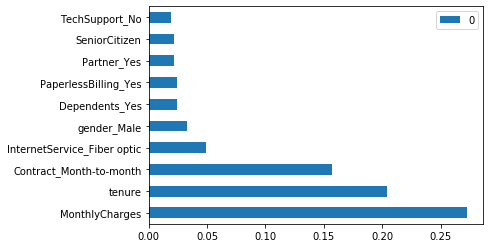

In [231]:
feat.sort_values(by=0,ascending=False).head(10).plot(kind='barh')

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1018
           1       0.65      0.47      0.55       391

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



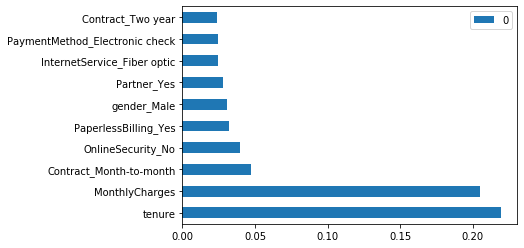

In [238]:
feat2=rf.feature_importances_
features=pd.DataFrame(feat2,index=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])
features.sort_values(by=0,ascending=False).head(10).plot(kind='barh')

# Very Interesting ! In Random forest the tenure has the highest degree of feature importance . Furthermore, accuracy of logistic regression is higher than Random Forest.Lets do a grid search

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [242]:
estimators=range(50,100)
max_features = ['auto', 'sqrt']
max_depth = range(4,12)
min_samples_split = range(2,8)
min_samples_leaf = range(1,8)
bootstrap = [True, False]
criterion=['gini','entropy']


In [246]:
random_grid = {'n_estimators':estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}

In [248]:
rf=RandomForestClassifier()
rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=1)

In [249]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [250]:
best_estimate=rf.best_params_
best_estimate

{'n_estimators': 77,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': True}

In [254]:
rf2=RandomForestClassifier(**best_estimate)

In [255]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=77,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [256]:
y_pred=rf2.predict(X_test)

In [257]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1122
           1       0.51      0.70      0.59       287

    accuracy                           0.80      1409
   macro avg       0.71      0.77      0.73      1409
weighted avg       0.83      0.80      0.81      1409



# Thank you for your attention..We found out through algorithms that Logistic Regression was far better when it came to accuracy. Moreover, the most important features were contract type, and monthly charges. A more detailed analysis would include what determines monthly charges and how can businesses address these issues to retain customers